In [ ]:
pip install tensorflow
pip install keras

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [8]:

input_img = Input(shape=(28, 28, 1))    # adapt this if using 'channels_first' image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

print("shape of encoded", K.int_shape(encoded))

shape of encoded (None, 4, 4, 8)


In [3]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [4]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))    
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

In [6]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='conv_autoencoder')], verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 73s - loss: 0.2182 - val_loss: 0.1676
Epoch 2/50
 - 78s - loss: 0.1552 - val_loss: 0.1447
Epoch 3/50
 - 63s - loss: 0.1419 - val_loss: 0.1381
Epoch 4/50
 - 63s - loss: 0.1336 - val_loss: 0.1287
Epoch 5/50
 - 63s - loss: 0.1287 - val_loss: 0.1244
Epoch 6/50
 - 63s - loss: 0.1252 - val_loss: 0.1245
Epoch 7/50
 - 63s - loss: 0.1224 - val_loss: 0.1171
Epoch 8/50
 - 63s - loss: 0.1204 - val_loss: 0.1209
Epoch 9/50
 - 64s - loss: 0.1190 - val_loss: 0.1208
Epoch 10/50
 - 63s - loss: 0.1173 - val_loss: 0.1199
Epoch 11/50
 - 63s - loss: 0.1160 - val_loss: 0.1126
Epoch 12/50
 - 64s - loss: 0.1146 - val_loss: 0.1110
Epoch 13/50
 - 64s - loss: 0.1135 - val_loss: 0.1130
Epoch 14/50
 - 64s - loss: 0.1131 - val_loss: 0.1113
Epoch 15/50
 - 64s - loss: 0.1121 - val_loss: 0.1109
Epoch 16/50
 - 64s - loss: 0.1117 - val_loss: 0.1093
Epoch 17/50
 - 64s - loss: 0.1108 - val_loss: 0.1091
Epoch 18/50
 - 64s - loss: 0.1101 - val_loss: 0.1089
Epoch

In [9]:
decoded_imgs = autoencoder.predict(x_test)

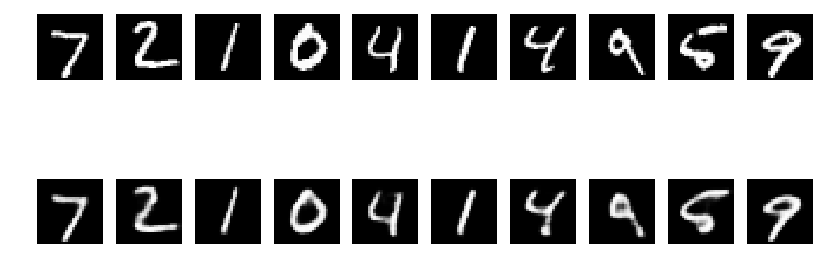

In [10]:
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

In [11]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# save latent space features 128-d vector
pickle.dump(encoded_imgs, open('conv_autoe_features.pickle', 'wb'))

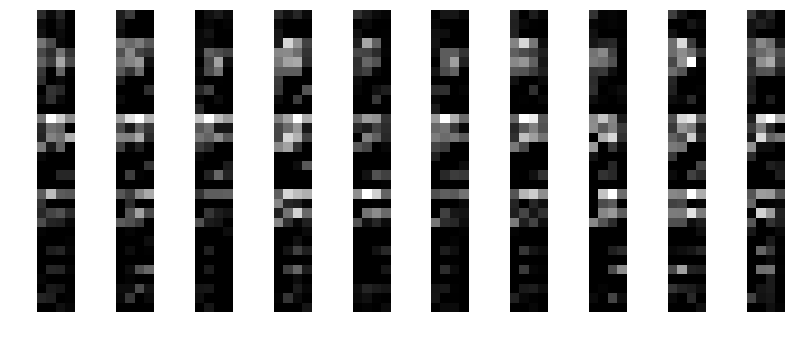

In [12]:
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.set_axis_off()

plt.show()